In [1]:
#import data
import pandas as pd
df = pd.read_csv('Score_Results_semicompelte_2.csv')
df_1 = pd.read_csv('Score_Results_20_30_40.csv')
df_2 = pd.read_csv('Score_Results_50.csv')

df_5 = df[(df["epochs"]== 5)]
df_10 = df[(df["epochs"]== 10)]
df = pd.concat((df_5, df_10), ignore_index=True, axis=0)
df = pd.concat((df, df_1), ignore_index=True, axis=0)
df = pd.concat((df, df_2), ignore_index=True, axis=0)

#define search space
epochs = [5, 10, 20, 30, 40, 50]
batches = [64, 128, 256, 512, 1024]
learning_rate = [0.0001, 0.00001]
lambda_weight = [0.2, 0.4, 0.6, 0.8]
loss_function = ["log", "uniform"]

column_names = ['epochs', 'batch_size', 'learning_rate', 'lambda_weight', 'loss_function']
#generate pandas dataframe of all Hyperparameter combinations
df_size = pd.DataFrame(columns=column_names)
i= 0
for epoch in epochs:
    for batch in batches:
        for rates in learning_rate:
            for lb in lambda_weight:
                for loss in loss_function:
                    temp = [epoch, batch, rates, lb, loss]
                    new_row = pd.DataFrame([temp], columns=column_names)
                    df_size = pd.concat([df_size, new_row], ignore_index=True)

df

C:\Users\lklei\AppData\Local\Temp\ipykernel_24232\2382793571.py:31: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_size = pd.concat([df_size, new_row], ignore_index=True)


,epochs,batch_size,learning_rate,lambda_weight,loss_function,ari,hvg,asw,f1,nmi,sil,graph,pcr,sil_batch,avg_bio,avg_batch,time
0,5,64,0.00010,0.2,log,0.503605,0.208250,0.802461,0.863271,0.743260,0.486910,0.817944,0.237479,0.823587,0.601293,0.626337,359.075790
1,5,64,0.00010,0.2,uniform,0.503605,0.208000,0.732037,0.842818,0.743260,0.619435,0.824849,0.462823,0.821479,0.608192,0.703050,297.180768
2,5,64,0.00010,0.4,log,0.503605,0.234625,0.720839,0.834008,0.743260,0.540880,0.968877,0.418965,0.796020,0.596203,0.727954,269.455522
3,5,64,0.00010,0.4,uniform,0.503605,0.237875,0.705655,0.825137,0.743260,0.615865,0.933981,0.507965,0.820687,0.605233,0.754211,269.690529
4,5,64,0.00010,0.6,log,0.503605,0.279500,0.669764,0.844504,0.743260,0.616848,0.934926,0.657671,0.836677,0.609580,0.809758,266.410882
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,50,512,0.00001,0.4,uniform,0.639873,0.265375,0.708752,0.902062,0.860395,0.644680,0.847160,0.367791,0.855944,0.670189,0.690298,505.497123
236,50,1024,0.00010,0.4,log,0.639873,0.261250,0.767347,0.980769,0.860395,0.653279,0.848684,0.368803,0.828178,0.693819,0.681888,407.710444
237,50,1024,0.00010,0.4,uniform,0.639873,0.261250,0.760760,0.981993,0.860395,0.709029,0.924883,0.448041,0.842342,0.702217,0.738422,410.972153
238,50,1024,0.00001,0.4,log,0.639873,0.344500,0.741340,0.896641,0.860395,0.584411,0.818776,0.243861,0.848760,0.677860,0.637132,418.485030


In [2]:
#---Find the best combination--
#best batch score
df = df.sort_values(by=['avg_bio'], ascending=False)
#df_t = df[(df["epochs"]== 20)]
#df_t['avg_batch'].mean()
df_t = df[(df["epochs"] == 5)]
df_t

,epochs,batch_size,learning_rate,lambda_weight,loss_function,ari,hvg,asw,f1,nmi,sil,graph,pcr,sil_batch,avg_bio,avg_batch,time
7,5,64,0.00010,0.8,uniform,0.503605,0.234250,0.711032,0.908629,0.74326,0.653064,0.893142,0.497457,0.820374,0.625640,0.736991,270.435279
28,5,128,0.00001,0.6,log,0.503605,0.364625,0.720252,0.842105,0.74326,0.571108,0.817604,0.246137,0.837365,0.624159,0.633702,197.602618
30,5,128,0.00001,0.8,log,0.503605,0.365250,0.718018,0.842105,0.74326,0.572639,0.817324,0.250998,0.836976,0.624146,0.635099,193.603642
24,5,128,0.00001,0.2,log,0.503605,0.364750,0.718180,0.842105,0.74326,0.570652,0.817716,0.242676,0.836845,0.623759,0.632412,196.279915
26,5,128,0.00001,0.4,log,0.503605,0.363625,0.718113,0.842105,0.74326,0.570813,0.817672,0.243688,0.836813,0.623587,0.632724,196.254305
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,5,64,0.00010,0.2,log,0.503605,0.208250,0.802461,0.863271,0.74326,0.486910,0.817944,0.237479,0.823587,0.601293,0.626337,359.075790
21,5,128,0.00010,0.6,uniform,0.503605,0.242000,0.658703,0.841415,0.74326,0.609528,0.942394,0.549507,0.819438,0.599752,0.770446,197.125013
2,5,64,0.00010,0.4,log,0.503605,0.234625,0.720839,0.834008,0.74326,0.540880,0.968877,0.418965,0.796020,0.596203,0.727954,269.455522
16,5,128,0.00010,0.2,log,0.503605,0.258750,0.701779,0.800000,0.74326,0.564630,0.816819,0.257984,0.829895,0.595337,0.634899,193.737636


In [3]:
#---Find avg best score--
df_avg = (df["avg_bio"]+df["avg_batch"])/2
df_avg.sort_values(ascending=False)

221    0.729053
224    0.728504
228    0.724633
204    0.722418
161    0.722380
         ...   
16     0.615118
36     0.614667
0      0.613815
32     0.607104
34     0.602655
Length: 240, dtype: float64

In [4]:
# Create a boolean mask for the rows you want
mask = df.index.isin([221, 224, 228, 204])

# Apply the mask
selected_rows = df[mask]
selected_rows = selected_rows.loc[:, ["epochs",	"batch_size",	"learning_rate",	"lambda_weight",	"loss_function", "avg_bio",	"avg_batch"]]
latex_table = selected_rows.to_latex(
    index=False,       # Set to True if you want to include the row indices
    float_format="%.4f",  # Format floating point numbers
    caption="Selected Data Rows",  # Add a caption
    label="tab:selected_rows",    # Add a label for referencing
    position="ht"      # Control table placement
)
with open('selected_rows_table.tex', 'w') as f:
    f.write(latex_table)

## Epoch and Batch Plot

In [42]:
import matplotlib.pyplot as plt
#--prepare data to plot batches and epochs over accuracy and time--
#initilizes arrays to save mean and standart deviation of time annd score values for epochs
bio_avg = []
bat_avg = []
tim_avg = []
bio_std = []
bat_std = []
tim_std = []

#iterate over all epoch values and save average time and scores
for epoch in epochs:    
    df_temp = df[(df["epochs"]== epoch)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    tim_avg.append(df_temp["time"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())
    tim_std.append(df_temp["time"].std())

#save results in pandas data frame    
mean_values_epoch = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'tim_avg': tim_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        'tim_std': tim_std
        })

#reinitilizes arrays to save mean and standart deviation of time annd score values for batches
bio_avg = []
bat_avg = []
tim_avg = []
bio_std = []
bat_std = []
tim_std = []
#iterate over all batch values and save average time and scores
for batch in batches:  
    df_temp = df[(df["batch_size"]== batch)] 
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    tim_avg.append(df_temp["time"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())
    tim_std.append(df_temp["time"].std())

#save results in pandas data frame    
mean_values_batch = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'tim_avg': tim_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        'tim_std': tim_std
        })

mean_values_epoch

,bio_avg,bat_avg,tim_avg,bio_std,bat_std,tim_std
0,0.614400,0.666029,182.855282,0.007205,0.038536,52.778237
1,0.621681,0.674605,259.620327,0.009133,0.041118,99.057555
2,0.667907,0.681665,391.659769,0.012326,0.035137,197.942179
3,0.674109,0.688195,534.246144,0.012604,0.039888,291.139880
4,0.678689,0.696174,694.862370,0.010814,0.038606,385.629468
5,0.692931,0.703408,876.227461,0.011075,0.037611,483.406844


In [31]:
mean_values_batch

,bio_avg,bat_avg,tim_avg,bio_std,bat_std,tim_std
0,0.629744,0.700532,490.580582,0.015530,0.046785,203.638889
1,0.620635,0.682765,290.942047,0.013396,0.043896,102.652893
2,0.614750,0.656885,191.525924,0.009473,0.026791,29.791041
3,0.620018,0.659595,163.745865,0.007942,0.027496,19.906867
4,0.618784,0.659312,149.808612,0.006946,0.028704,16.049431


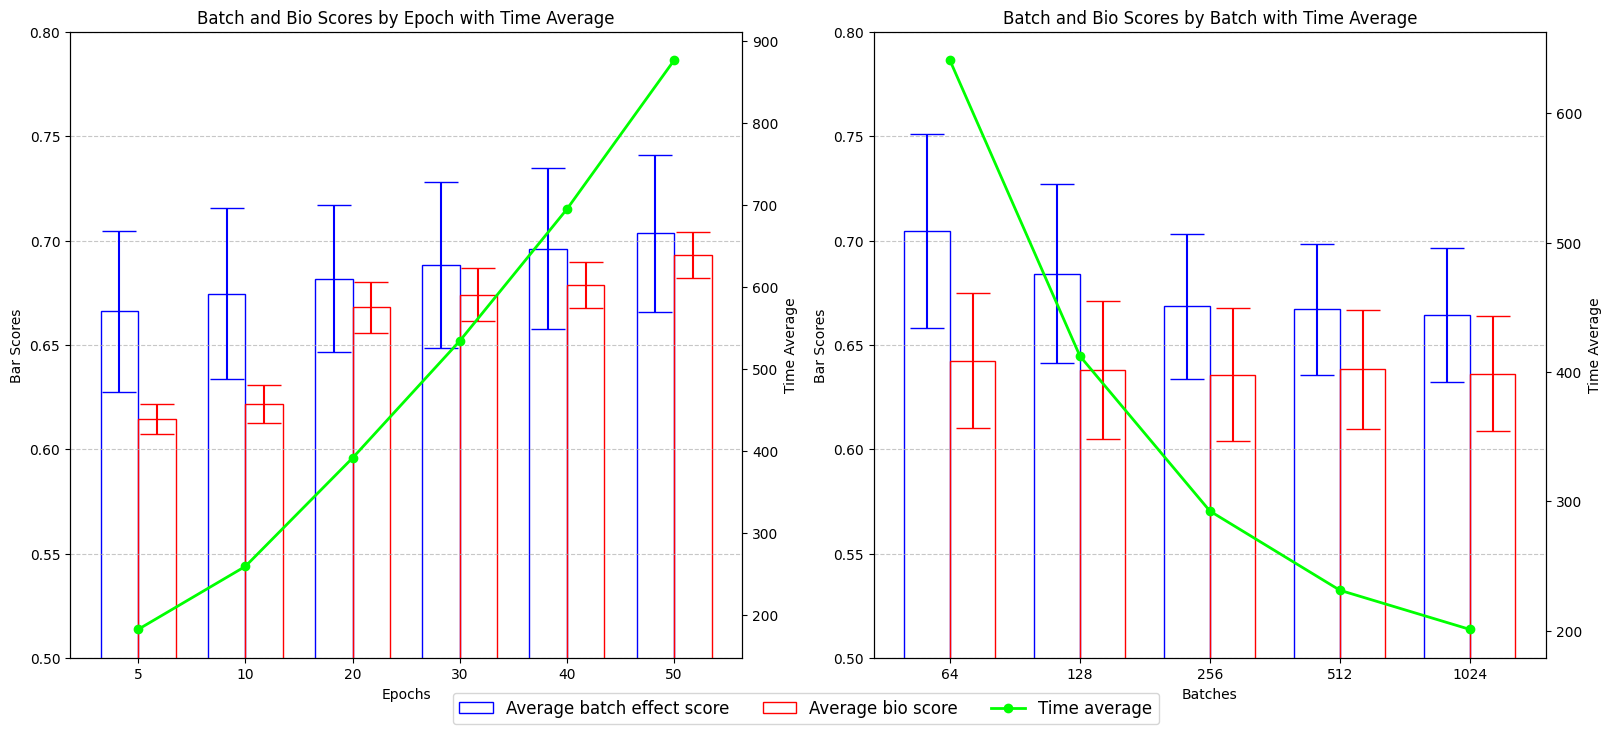

In [ ]:
import numpy as np
# Set up color scheme to be consistent across both plots
colors = [(0, 0, 1, 1), (1, 0, 0, 1), (0, 1, 0, 1), (1, 0, 1, 1)]
width = 0.35  # the width of the bars

# Create figure with 2 subplots
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(16, 7), constrained_layout=True)

# FIRST SUBPLOT: Epoch data
# -----------------------
x_epoch = np.arange(len(epochs))

# First bar chart (batch effect score)
rects1 = ax1.bar(x_epoch - width/2,
            height=mean_values_epoch["bat_avg"],
            yerr=mean_values_epoch["bat_std"],
            capsize=12,
            width=width,
            label='Average batch effect score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[0],
            ecolor=colors[0]  # using the same color for error bars
            )

# Second bar chart (bio score)
rects2 = ax1.bar(x_epoch + width/2,
            height=mean_values_epoch["bio_avg"],
            yerr=mean_values_epoch["bio_std"],
            capsize=12,
            width=width,
            label='Average bio score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[1],
            ecolor=colors[1]  # using the same color for error bars
            )

# Set up labels for primary y-axis
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Bar Scores')
ax1.set_ylim(0.5, 0.8)
ax1.set_title('Batch and Bio Scores by Epoch with Time Average')
ax1.set_xticks(x_epoch)
ax1.set_xticklabels(epochs)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for the line plot
ax2 = ax1.twinx()

# Line plot (time average)
line1 = ax2.plot(x_epoch, mean_values_epoch["tim_avg"], color=colors[2], marker='o', 
               linestyle='-', linewidth=2, label='Time average')
ax2.set_ylabel('Time Average')

# Combine legends from both axes for first subplot
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# SECOND SUBPLOT: Batch data
# ------------------------
x_batch = np.arange(len(batches))

# First bar chart (batch effect score)
rects3 = ax3.bar(x_batch - width/2,
            height=mean_values_batch["bat_avg"],
            yerr=mean_values_batch["bat_std"],
            capsize=12,
            width=width,
            label='Average batch effect score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[0],
            ecolor=colors[0]  # using the same color for error bars
            )

# Second bar chart (bio score)
rects4 = ax3.bar(x_batch + width/2,
            height=mean_values_batch["bio_avg"],
            yerr=mean_values_batch["bio_std"],
            capsize=12,
            width=width,
            label='Average bio score',
            color=(0, 0, 0, 0),  # transparent fill
            edgecolor=colors[1],
            ecolor=colors[1]  # using the same color for error bars
            )

# Set up labels for primary y-axis of second subplot
ax3.set_xlabel('Batches')
ax3.set_ylabel('Bar Scores')
ax3.set_ylim(0.5, 0.8)
ax3.set_title('Batch and Bio Scores by Batch with Time Average')
ax3.set_xticks(x_batch)
ax3.set_xticklabels(batches)
ax3.grid(axis='y', linestyle='--', alpha=0.7)

# Create secondary y-axis for the line plot in second subplot
ax4 = ax3.twinx()

# Line plot (time average)
line2 = ax4.plot(x_batch, mean_values_batch["tim_avg"], color=colors[2], marker='o', 
               linestyle='-', linewidth=2, label='Time average')
ax4.set_ylabel('Time Average')

# Create a single legend for the entire figure
# Pull all handles and labels
all_lines = lines1 + lines2  # We only need one set since both plots use the same labels
all_labels = labels1 + labels2

# Add the legend to the figure rather than to a specific axis
fig.legend(all_lines, all_labels, loc='upper center', bbox_to_anchor=(0.5, 0.03), 
          fontsize=12, frameon=True, ncol=3)

# Add overall title to the figure
#fig.suptitle('Combined Analysis of Batch and Epoch Metrics', fontsize=16, y=0.98)

# Use constrained_layout for automatic spacing (alternative to tight_layout)
# This is already set in the plt.subplots() call

plt.show()

## Learning rate, lambda and loss function

In [9]:
#--prepare data to plot learningrate, lambda and loss function over accuracy and time--
#--learning rate--
#initilizes arrays to save mean and standart deviation of time and score values
bio_avg = []
bat_avg = []
bio_std = []
bat_std = []

#iterate over all epoch values and save average time and scores
for learning in learning_rate:    
    df_temp = df[(df["learning_rate"]== learning)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())

#save results in pandas data frame    
mean_values_learning = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        })

#--lambda--
#initilizes arrays to save mean and standart deviation of time annd score values
bio_avg = []
bat_avg = []
bio_std = []
bat_std = []

#iterate over all epoch values and save average time and scores
for lamba in lambda_weight:    
    df_temp = df[(df["lambda_weight"]== lamba)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())

#save results in pandas data frame    
mean_values_lambda = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        })

#--loss function--
#initilizes arrays to save mean and standart deviation of time annd score values 
bio_avg = []
bat_avg = []
bio_std = []
bat_std = []


#iterate over all epoch values and save average time and scores
for loss in loss_function:    
    df_temp = df[(df["loss_function"] == loss)]
    bio_avg.append(df_temp["avg_bio"].mean())
    bat_avg.append(df_temp["avg_batch"].mean())
    bio_std.append(df_temp["avg_bio"].std()) 
    bat_std.append(df_temp["avg_batch"].std())
    print(bio_avg)

#save results in pandas data frame    
mean_values_loss = pd.DataFrame({
        'bio_avg': bio_avg,
        'bat_avg': bat_avg,
        'bio_std': bio_std,
        'bat_std': bat_std,
        })


[np.float64(0.622177904434516)]
[np.float64(0.622177904434516), np.float64(0.6209392816821186)]


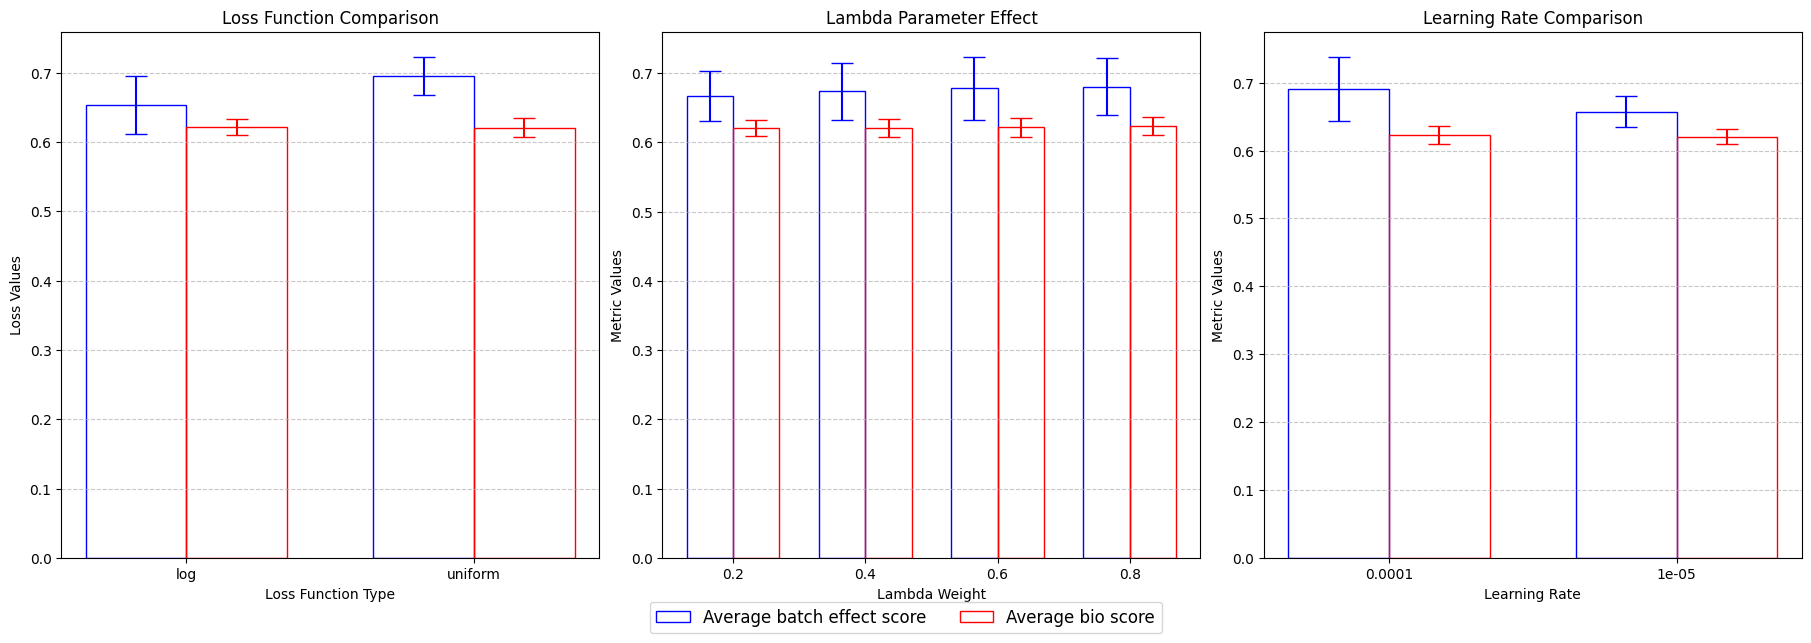

In [33]:
#---Plot effects--
# Set up color scheme to be consistent across all plots
colors = [(0, 0, 1, 1), (1, 0, 0, 1), (0, 1, 0, 1)]
width = 0.35  # the width of the bars

# Create figure with 3 subplots side by side (1 row, 3 columns)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6), constrained_layout=True)

# Function to create a grouped bar chart with variable x-axis
def create_bar_chart(ax, data, x_values, title, ylabel, xlabel):
    # Generate x positions for the bars
    x = np.arange(len(x_values))
    
    # First bar chart (batch effect score)
    ax.bar(x - width/2,
           height=data["bat_avg"],
           yerr=data["bat_std"],
           capsize=8,
           width=width,
           label='Average batch effect score',
           color=(0, 0, 0, 0),  # transparent fill
           edgecolor=colors[0],
           ecolor=colors[0])
    
    # Second bar chart (bio score)
    ax.bar(x + width/2,
           height=data["bio_avg"],
           yerr=data["bio_std"],
           capsize=8,
           width=width,
           label='Average bio score',
           color=(0, 0, 0, 0),  # transparent fill
           edgecolor=colors[1],
           ecolor=colors[1])
    
    # Set up labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(x_values)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# FIRST SUBPLOT: Loss Function data
create_bar_chart(ax1, mean_values_loss, loss_function, 
                'Loss Function Comparison', 'Loss Values', 'Loss Function Type')

# SECOND SUBPLOT: Lambda Weight data
create_bar_chart(ax2, mean_values_lambda, lambda_weight, 
                'Lambda Parameter Effect', 'Metric Values', 'Lambda Weight')

# THIRD SUBPLOT: Learning Rate data
create_bar_chart(ax3, mean_values_learning, learning_rate, 
                'Learning Rate Comparison', 'Metric Values', 'Learning Rate')


# Create a single legend for the entire figure
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.02), 
          fontsize=12, frameon=True, ncol=2)

# Add overall title to the figure
#fig.suptitle('Effects of Loss Functions, Lambda Weights, and Learning Rates', fontsize=16, y=0.98)

plt.show()